<a href="https://colab.research.google.com/github/Pranov1984/ComputerVision_10MonkeyBreeds_Classification/blob/main/TransferLearning_classify_10_monkey_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

Set an appropriate path for images

In [ ]:
images_path = "/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/monkeys_dataset.zip"


# **Extracting the dataset.zip to the present working directory**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
  zip.extractall()

In [ ]:
!ls

dataset  gdrive  sample_data


In [ ]:
len(os.listdir('./dataset/train')) , len(os.listdir('./dataset/test')), len(os.listdir('./dataset/predict'))

(10, 10, 5)

In [ ]:
os.listdir('./dataset/train') ,os.listdir('./dataset/test'), os.listdir('./dataset/predict')

(['n8', 'n6', 'n0', 'n3', 'n9', 'n2', 'n7', 'n4', 'n5', 'n1'],
 ['n8', 'n6', 'n0', 'n3', 'n9', 'n2', 'n7', 'n4', 'n5', 'n1'],
 ['n411.jpg', 'n008.jpg', 'n111.jpg', 'n610.jpg', 'n311.jpg'])

In [ ]:
len(os.listdir('./dataset/train/n0')) , len(os.listdir('./dataset/test/n0'))

(105, 26)

In [ ]:
train_dir = os.listdir('./dataset/train')
test_dir = os.listdir('./dataset/test')
val_dir = os.listdir('./dataset/predict')

Check out the number of training images and test images. Also find out whether it is a binary classification or multilabel classification problem

In [ ]:
!ls

dataset  gdrive  sample_data


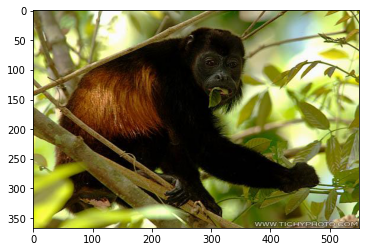

In [ ]:
img = io.imread(os.path.join('./dataset/train/n0/n0018.jpg'))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(367, 550, 3)

In [ ]:
PATH = ('./dataset/')
PATH

'./dataset/'

In [ ]:
# Define data path for the train, test and predict folder
train_path = os.path.join(PATH,'train')
test_path = os.path.join(PATH, 'test')
predict_path = os.path.join(PATH, 'predict')

In [ ]:
train_path

'./dataset/train'

In [ ]:
os.listdir(train_path), os.listdir(test_path), os.listdir(predict_path)

(['n8', 'n6', 'n0', 'n3', 'n9', 'n2', 'n7', 'n4', 'n5', 'n1'],
 ['n8', 'n6', 'n0', 'n3', 'n9', 'n2', 'n7', 'n4', 'n5', 'n1'],
 ['n411.jpg', 'n008.jpg', 'n111.jpg', 'n610.jpg', 'n311.jpg'])

In [ ]:
# Define the directory paths for the train, test and predict

train_dir = os.listdir(train_path)
test_dir = os.listdir(test_path)
val_dir = os.listdir(predict_path)

In [ ]:
print("Total no. of breeds of monkeys being considered for classification: ", len(train_dir))

Total no. of breeds of monkeys being considered for classification:  10


In [ ]:
for f in train_dir:
    print("Total training  images of monkey type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(train_path+'/'+f))))

Total training  images of monkey type n8 is: 106
Total training  images of monkey type n6 is: 106
Total training  images of monkey type n0 is: 105
Total training  images of monkey type n3 is: 122
Total training  images of monkey type n9 is: 106
Total training  images of monkey type n2 is: 110
Total training  images of monkey type n7 is: 114
Total training  images of monkey type n4 is: 105
Total training  images of monkey type n5 is: 113
Total training  images of monkey type n1 is: 111


In [ ]:
for f in test_dir:
    print("Total training  images of monkey type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(test_path+'/'+f))))

Total training  images of monkey type n8 is: 27
Total training  images of monkey type n6 is: 26
Total training  images of monkey type n0 is: 26
Total training  images of monkey type n3 is: 30
Total training  images of monkey type n9 is: 26
Total training  images of monkey type n2 is: 27
Total training  images of monkey type n7 is: 28
Total training  images of monkey type n4 is: 26
Total training  images of monkey type n5 is: 28
Total training  images of monkey type n1 is: 28


## Print some of the image names in each of the train and test folders


In [ ]:
for f in train_dir:
    print("Five train  image names of monkey type n{fname} is: {img_name} "
          .format(fname = f, img_name = os.listdir(train_path+'/'+f)[0:5]))

Five train  image names of monkey type nn8 is: ['n8022.jpg', 'n8062.jpg', 'n8059.jpg', 'n8134.jpg', 'n8110.jpg'] 
Five train  image names of monkey type nn6 is: ['n6115.jpg', 'n6062.jpg', 'n6132.jpg', 'n6147.jpg', 'n6123.jpg'] 
Five train  image names of monkey type nn0 is: ['n0031.jpg', 'n0113.jpg', 'n0049.jpg', 'n0048.jpg', 'n0053.jpg'] 
Five train  image names of monkey type nn3 is: ['n3171.jpg', 'n3045.jpg', 'n3149.jpg', 'n3047.jpg', 'n3035.jpg'] 
Five train  image names of monkey type nn9 is: ['n9144.jpg', 'n9145.jpg', 'n9155.jpg', 'n9048.jpg', 'n9060.jpg'] 
Five train  image names of monkey type nn2 is: ['n2110.jpg', 'n2158.jpg', 'n2022.jpg', 'n2164.jpg', 'n2024.jpg'] 
Five train  image names of monkey type nn7 is: ['n7022.jpg', 'n7055.jpg', 'n7071.jpg', 'n7156.jpg', 'n7148.jpg'] 
Five train  image names of monkey type nn4 is: ['n4134.jpg', 'n41558.jpg', 'n4120.jpg', 'n4045.jpg', 'n41565.jpg'] 
Five train  image names of monkey type nn5 is: ['n5129.jpg', 'n5117.jpg', 'n5047.jpg',

In [ ]:
for f in test_dir:
    print("Five test  image names of monkey type n{fname} is: {img_name} "
          .format(fname = f, img_name = os.listdir(test_path+'/'+f)[0:5]))

Five test  image names of monkey type nn8 is: ['n819.jpg', 'n803.jpg', 'n8012.jpg', 'n804.jpg', 'n809.jpg'] 
Five test  image names of monkey type nn6 is: ['n6010.jpg', 'n6011.jpg', 'n611.jpg', 'n612.jpg', 'n609.jpg'] 
Five test  image names of monkey type nn0 is: ['n012.jpg', 'n000.jpg', 'n014.jpg', 'n004.jpg', 'n010.jpg'] 
Five test  image names of monkey type nn3 is: ['n308.jpg', 'n3015.jpg', 'n318.jpg', 'n319.jpg', 'n3013.jpg'] 
Five test  image names of monkey type nn9 is: ['n903.jpg', 'n911.jpg', 'n910.jpg', 'n913.jpg', 'n9015.jpg'] 
Five test  image names of monkey type nn2 is: ['n206.jpg', 'n2014.jpg', 'n215.jpg', 'n218.jpg', 'n214.jpg'] 
Five test  image names of monkey type nn7 is: ['n704.jpg', 'n715.jpg', 'n712.jpg', 'n714.jpg', 'n7012.jpg'] 
Five test  image names of monkey type nn4 is: ['n414.jpg', 'n410.jpg', 'n4015.jpg', 'n418.jpg', 'n411.jpg'] 
Five test  image names of monkey type nn5 is: ['n518.jpg', 'n511.jpg', 'n5011.jpg', 'n5013.jpg', 'n516.jpg'] 
Five test  image 

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

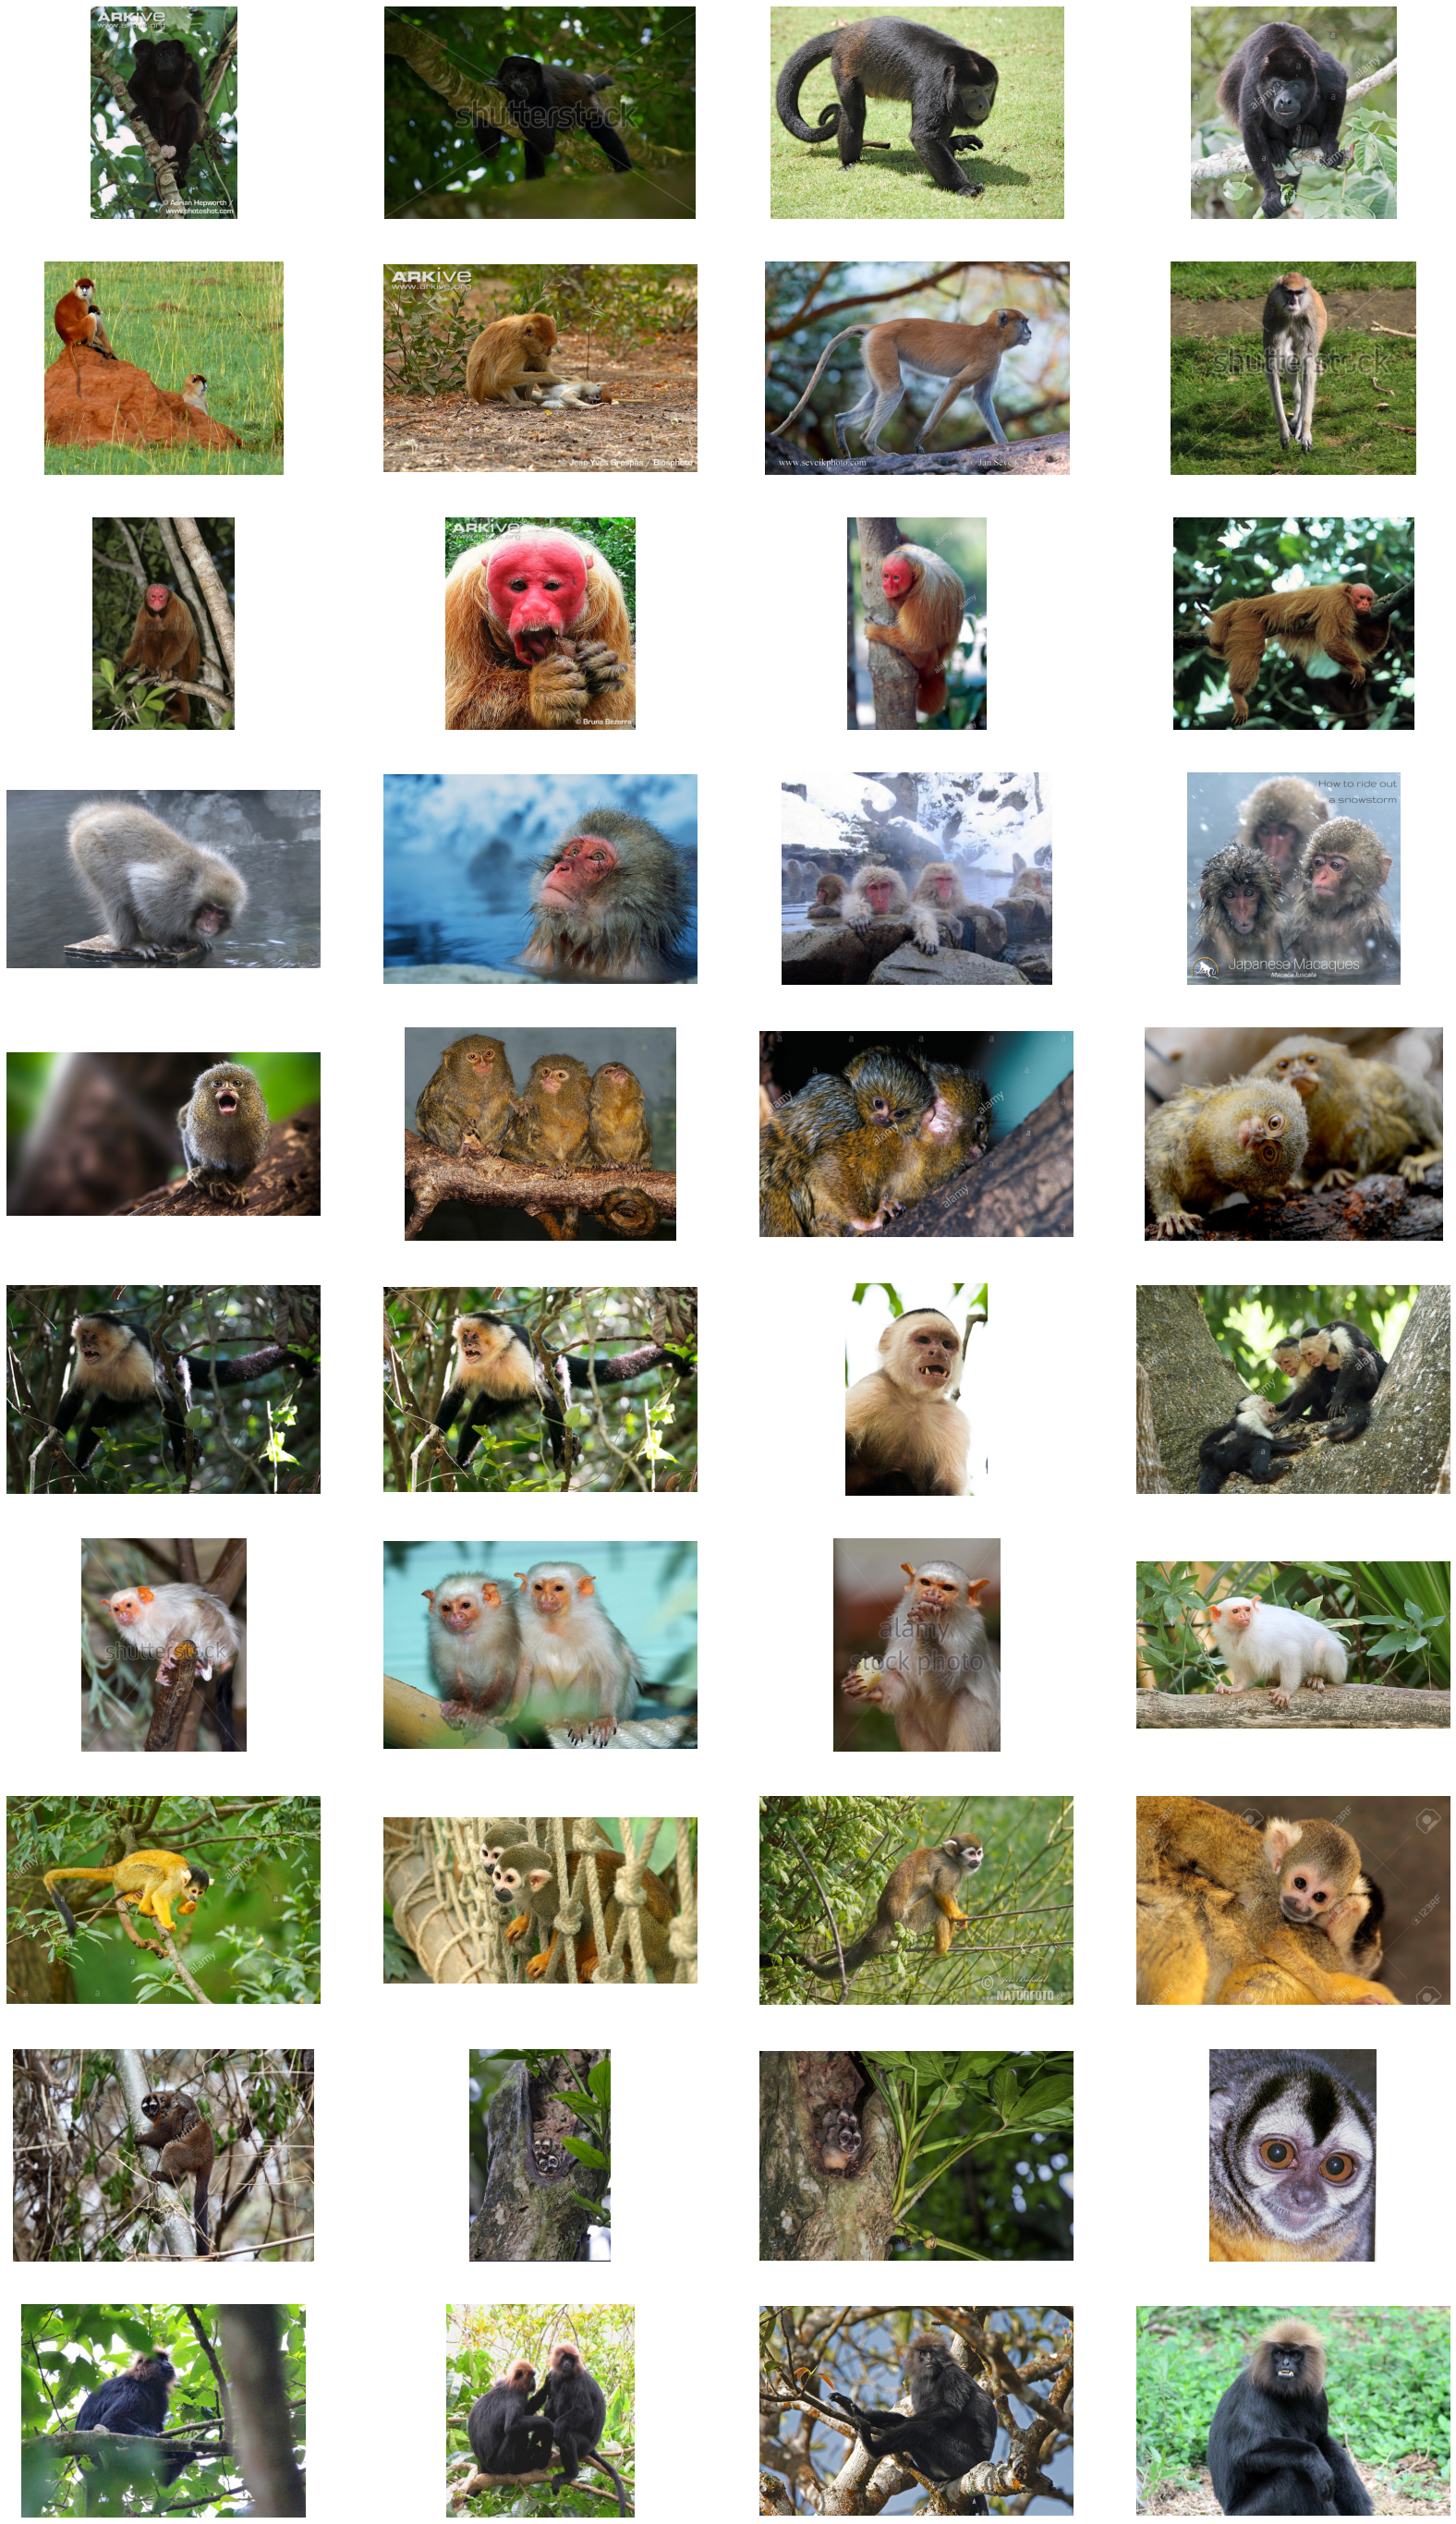

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 5
next_n0_pix = [os.path.join(train_path+'/n0', fname) 
                for fname in os.listdir(train_path+'/n0')[pic_index-4:pic_index]]
next_n1_pix = [os.path.join(train_path+'/n1', fname) 
                for fname in os.listdir(train_path+'/n1')[pic_index-4:pic_index]]
next_n2_pix = [os.path.join(train_path+'/n2', fname) 
                for fname in os.listdir(train_path+'/n2')[pic_index-4:pic_index]]
next_n3_pix = [os.path.join(train_path+'/n3', fname) 
                for fname in os.listdir(train_path+'/n3')[pic_index-4:pic_index]]
next_n4_pix = [os.path.join(train_path+'/n4', fname) 
                for fname in os.listdir(train_path+'/n4')[pic_index-4:pic_index]]
next_n5_pix = [os.path.join(train_path+'/n5', fname) 
                for fname in os.listdir(train_path+'/n5')[pic_index-4:pic_index]]
next_n6_pix = [os.path.join(train_path+'/n6', fname) 
                for fname in os.listdir(train_path+'/n6')[pic_index-4:pic_index]]
next_n7_pix = [os.path.join(train_path+'/n7', fname) 
                for fname in os.listdir(train_path+'/n7')[pic_index-4:pic_index]]
next_n8_pix = [os.path.join(train_path+'/n8', fname) 
                for fname in os.listdir(train_path+'/n8')[pic_index-4:pic_index]]
next_n9_pix = [os.path.join(train_path+'/n9', fname) 
                for fname in os.listdir(train_path+'/n9')[pic_index-4:pic_index]]         

for i, img_path in enumerate(next_n0_pix+next_n1_pix+next_n2_pix+next_n3_pix+next_n4_pix+next_n5_pix+next_n6_pix+next_n7_pix+next_n8_pix+next_n9_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import numpy as np
import os
import time
from keras.applications import ResNet50
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras import optimizers

In [ ]:
img_data_list=[]
labels=[]
for dataset in train_dir:
	img_list=os.listdir(train_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

Loaded the images of dataset-n8

Loaded the images of dataset-n6

Loaded the images of dataset-n0

Loaded the images of dataset-n3

Loaded the images of dataset-n9

Loaded the images of dataset-n2

Loaded the images of dataset-n7

Loaded the images of dataset-n4

Loaded the images of dataset-n5

Loaded the images of dataset-n1



In [ ]:
# Loading the training data
from keras.preprocessing import image

img_data_list=[]
labels=[]
for dataset in train_dir:
	img_list=os.listdir(train_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = train_path + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		print('Input image shape:', x.shape)
		img_data_list.append(x)
		labels.append(int(dataset[1]))

img_data = np.array(img_data_list)

Loaded the images of dataset-n8

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224

### Save the training data for later use

In [ ]:
np.save('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/train_data.npy', img_data)
np.save('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/train_label.npy',labels)

## Load the saved the training data and labels

In [ ]:
img_data = np.load('train_data.npy')
labels = np.load('train_label.npy')

#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(1098, 1, 224, 224, 3)
(1, 1098, 224, 224, 3)
(1098, 224, 224, 3)


In [ ]:
# Define the number of classes
num_classes = 10
num_of_samples = img_data.shape[0]
print(num_of_samples)

1098


In [ ]:
### Keeping the same order in which the folders lined up for the images to be processed into an array
names = ['n8','n6','n0','n3','n9','n2','n7','n4','n5', 'n1']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
classifier = Sequential()

classifier.add(Convolution2D(32,(3,3), input_shape=(224,224,3), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(3,3)))

classifier.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(3,3)))


classifier.add(Convolution2D(32,(2,2), activation='relu', padding='same'))
classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Flatten())
classifier.add(Dropout(0.3))

classifier.add(Dense(512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.1))

classifier.add(Dense(10, activation='softmax'))

print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [ ]:
optimizer=optimizers.Adam(lr=0.001)
classifier.compile(optimizer=optimizer, loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
hist = classifier.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))

Epoch 1/12
28/28 [==============================] - 1s 48ms/step - loss: 2.5000 - accuracy: 0.2335 - val_loss: 10.0890 - val_accuracy: 0.2136
Epoch 2/12
28/28 [==============================] - 1s 36ms/step - loss: 1.7563 - accuracy: 0.4055 - val_loss: 4.5766 - val_accuracy: 0.2591
Epoch 3/12
28/28 [==============================] - 1s 36ms/step - loss: 1.2174 - accuracy: 0.6014 - val_loss: 2.5479 - val_accuracy: 0.3273
Epoch 4/12
28/28 [==============================] - 1s 36ms/step - loss: 0.9081 - accuracy: 0.6936 - val_loss: 1.3509 - val_accuracy: 0.5818
Epoch 5/12
28/28 [==============================] - 1s 36ms/step - loss: 0.6402 - accuracy: 0.8075 - val_loss: 1.3349 - val_accuracy: 0.5864
Epoch 6/12
28/28 [==============================] - 1s 36ms/step - loss: 0.5807 - accuracy: 0.8109 - val_loss: 1.4589 - val_accuracy: 0.5318
Epoch 7/12
28/28 [==============================] - 1s 37ms/step - loss: 0.5468 - accuracy: 0.8257 - val_loss: 1.7102 - val_accuracy: 0.5591
Epoch 8/12
2

## Lets try a Resnet model and transfer learning

Training the model using pretrained models.

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

As we saw previously, convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of convnets, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

In [ ]:
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# Custom_resnet_model_1
#Training the classifier alone

In [ ]:
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

In [ ]:
custom_resnet_model.layers[-1].trainable

True

In [ ]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
28/28 [==============================] - 4s 150ms/step - loss: 1.3298 - accuracy: 0.5968 - val_loss: 0.4481 - val_accuracy: 0.8864
Epoch 2/12
28/28 [==============================] - 3s 117ms/step - loss: 0.2020 - accuracy: 0.9772 - val_loss: 0.2232 - val_accuracy: 0.9409
Epoch 3/12
28/28 [==============================] - 3s 118ms/step - loss: 0.0973 - accuracy: 0.9932 - val_loss: 0.1813 - val_accuracy: 0.9682
Epoch 4/12
28/28 [==============================] - 3s 117ms/step - loss: 0.0644 - accuracy: 0.9989 - val_loss: 0.1651 - val_accuracy: 0.9727
Epoch 5/12
28/28 [==============================] - 3s 118ms/step - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9682
Epoch 6/12
28/28 [==============================] - 3s 118ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9682
Epoch 7/12
28/28 [==============================] - 3s 119ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.1338 - val_accuracy: 0.9682
Epoch 

In [ ]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

22/22 [==============================] - 1s 40ms/step - loss: 0.1216 - accuracy: 0.9682


In [ ]:
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

[INFO] loss=0.1216, accuracy: 96.8182%


## Try another version, i.e a few intermediary dense layers and fine tune it. In the previous iteration we just added our last layer i.e. the classifier layer and trained the model

In [ ]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = ResNet50(weights='imagenet',include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 4 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [ ]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

## Set the Resnet layers as false for training. Only the 6 layers we added are to be finetuned and/or trained

In [ ]:
for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-6].trainable

True

In [ ]:
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
28/28 [==============================] - 4s 149ms/step - loss: 1.7320 - accuracy: 0.4590 - val_loss: 0.2812 - val_accuracy: 0.9636
Epoch 2/12
28/28 [==============================] - 3s 118ms/step - loss: 0.4569 - accuracy: 0.8462 - val_loss: 0.1542 - val_accuracy: 0.9682
Epoch 3/12
28/28 [==============================] - 3s 118ms/step - loss: 0.2692 - accuracy: 0.9066 - val_loss: 0.1065 - val_accuracy: 0.9727
Epoch 4/12
28/28 [==============================] - 3s 119ms/step - loss: 0.1834 - accuracy: 0.9476 - val_loss: 0.1097 - val_accuracy: 0.9636
Epoch 5/12
28/28 [==============================] - 3s 119ms/step - loss: 0.1165 - accuracy: 0.9624 - val_loss: 0.1060 - val_accuracy: 0.9727
Epoch 6/12
28/28 [==============================] - 3s 120ms/step - loss: 0.0828 - accuracy: 0.9761 - val_loss: 0.0928 - val_accuracy: 0.9682
Epoch 7/12
28/28 [==============================] - 3s 120ms/step - loss: 0.0714 - accuracy: 0.9749 - val_loss: 0.0944 - val_accuracy: 0.9818
Epoch 

In [ ]:
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

22/22 [==============================] - 1s 40ms/step - loss: 0.1288 - accuracy: 0.9682
[INFO] loss=0.1288, accuracy: 96.8182%


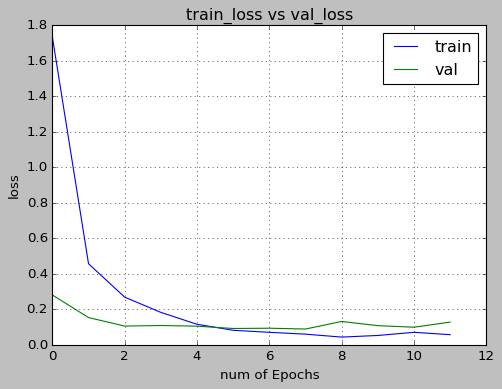

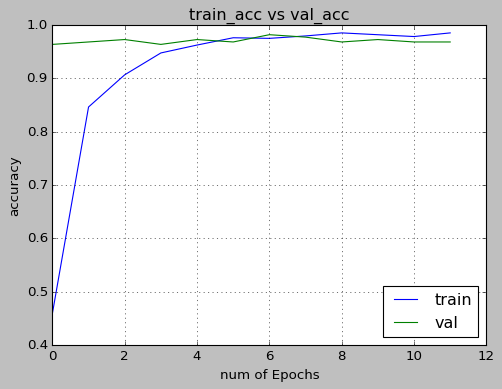

In [ ]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

## Save the model and weights of custom_resnet_model2 for future use

In [ ]:
custom_resnet_model2.save('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/Monkey_Species_TransferL.h5')
custom_resnet_model2.save_weights('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/Monkey_Species_TransferL_weights.h5')

In [ ]:
img_data_list=[]
labels=[]
for dataset in test_dir:
	img_list=os.listdir(test_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = test_path + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		print('Input image shape:', x.shape)
		img_data_list.append(x)
		labels.append(int(dataset[1]))

img_data = np.array(img_data_list)

Loaded the images of dataset-n8

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224

In [ ]:
for dataset in test_dir:
	img_list=os.listdir(test_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

Loaded the images of dataset-n8

Loaded the images of dataset-n6

Loaded the images of dataset-n0

Loaded the images of dataset-n3

Loaded the images of dataset-n9

Loaded the images of dataset-n2

Loaded the images of dataset-n7

Loaded the images of dataset-n4

Loaded the images of dataset-n5

Loaded the images of dataset-n1



In [ ]:
np.save('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/test.npy', img_data)
np.save('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/test_label.npy',labels)

In [ ]:
img_data = np.load('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/test.npy')
labels = np.load('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/test_label.npy')

In [ ]:
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(272, 1, 224, 224, 3)
(1, 272, 224, 224, 3)
(272, 224, 224, 3)


In [ ]:
# Define the number of classes
num_classes = 10
num_of_samples = img_data.shape[0]


names = ['n8','n6','n0','n3','n9','n2','n7','n4','n5','n1']
# convert class labels to on-hot encoding
Y_val = np_utils.to_categorical(labels, num_classes)
x_val=img_data

## Load the model and the weights

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/Monkey_Species_TransferL.h5')
model1.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#The pre-trained weights must exist in the current folder
model1.load_weights('/content/gdrive/My Drive/Colab Notebooks/AIML/Computer Vision/Monkey_Species_TransferL_weights.h5')

In [ ]:
(loss, accuracy) = model1.evaluate(x_val, Y_val, batch_size=10, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

28/28 [==============================] - 1s 38ms/step - loss: 0.0467 - accuracy: 0.9816
[INFO] loss=0.0467, accuracy: 98.1618%


# Achieved slightly better accuracy than before